# Palmer Penguins
<img src="Palmer Penguins/PPP.webp" 
     align="right" 
     width="500"/>
## A Beginner EDA

# I. Introduction


In [ ]:
•	Brief description of the Palmer Penguins dataset
•	Purpose of the EDA
•	Brief summary of the key findings

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

## Import libraries

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
pd.set_option('display.max_columns', None)
import sys
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import missingno as msno #Visualize null

# Pre-Processing
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

## Load the data

In [2]:
penguins_df = pd.read_csv('data/Palmer Penguins/penguins_size.csv')

### Data at a glance

In [3]:
penguins_df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


#### Columns and Data types 

In [4]:
penguins_df.columns

Index(['species', 'island', 'culmen_length_mm', 'culmen_depth_mm',
       'flipper_length_mm', 'body_mass_g', 'sex'],
      dtype='object')

In [5]:
penguins_df.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [6]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


#### `Categorical` Variables

In [7]:
penguins_df.select_dtypes(include='object').columns

Index(['species', 'island', 'sex'], dtype='object')

#### `Continuous` Variables

In [8]:
penguins_df.select_dtypes(include='float64').columns

Index(['culmen_length_mm', 'culmen_depth_mm', 'flipper_length_mm',
       'body_mass_g'],
      dtype='object')

# II. Data Cleaning and Preparation

- ## Checking for missing values and duplicates

In [9]:
penguins_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   culmen_length_mm   342 non-null    float64
 3   culmen_depth_mm    342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                334 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


In [10]:
penguins_df.isna().sum().sort_values(ascending = False)

sex                  10
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g           2
species               0
island                0
dtype: int64

In [ ]:
sex                  10
culmen_length_mm      2
culmen_depth_mm       2
flipper_length_mm     2
body_mass_g  

- ## Handling missing values and duplicates


In [11]:
penguins_df['sex'].unique()

array(['MALE', 'FEMALE', nan, '.'], dtype=object)

#### the sex column has a `.` in as a value.

#### Using mode to replace `NaN` values of `Categorical\Text` Variables

In [12]:
penguins_df['sex'].fillna(penguins_df['sex'].mode()[0],inplace = True)

#### Checking again

In [13]:
penguins_df['sex'].isna().sum()

0

In [14]:
penguins_df['sex'].unique()

array(['MALE', 'FEMALE', '.'], dtype=object)

#### Removing the `.`

In [15]:
penguins_df=penguins_df.replace('.','MALE')

In [16]:
penguins_df

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,MALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,MALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


#### Using Mean to replace `NaN` values of `Continuous/Numeric` Variables

In [17]:
penguins_df['culmen_length_mm'].fillna(penguins_df['culmen_length_mm'].mean(),inplace = True)
penguins_df['culmen_depth_mm'].fillna(penguins_df['culmen_depth_mm'].mean(),inplace = True)
penguins_df['flipper_length_mm'].fillna(penguins_df['flipper_length_mm'].mean(),inplace = True)
penguins_df['body_mass_g'].fillna(penguins_df['body_mass_g'].mean(),inplace = True)

#### Checking for the `NaN` Values again

In [18]:
penguins_df.isna().sum().sort_values(ascending = False)

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# III. Univariate Analysis

- ## Distribution of the target variable (species)


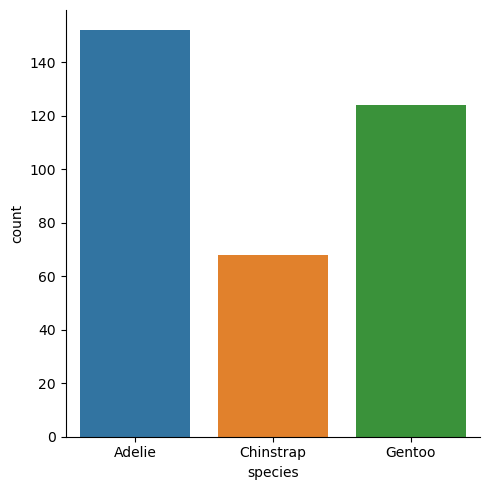

In [19]:
sns.catplot(data=penguins_df,x='species',kind='count')

- ## Histograms and density plots of each numeric variable


### Numeric Variables `'culmen_length_mm'`, `'culmen_depth_mm'`, `'flipper_length_mm'`, `'body_mass_g'`

<AxesSubplot: xlabel='culmen_length_mm', ylabel='Count'>

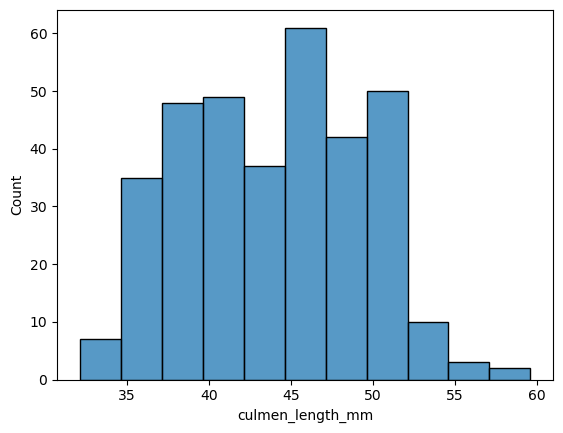

In [20]:
sns.histplot(data=penguins_df, x="culmen_length_mm")

<AxesSubplot: xlabel='culmen_depth_mm', ylabel='Count'>

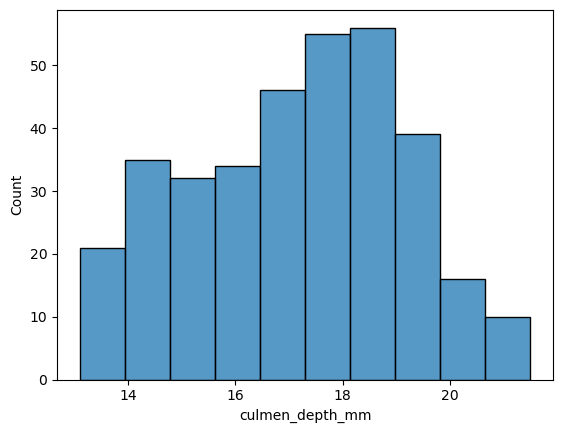

In [21]:
sns.histplot(data=penguins_df, x="culmen_depth_mm")

<AxesSubplot: xlabel='flipper_length_mm', ylabel='Count'>

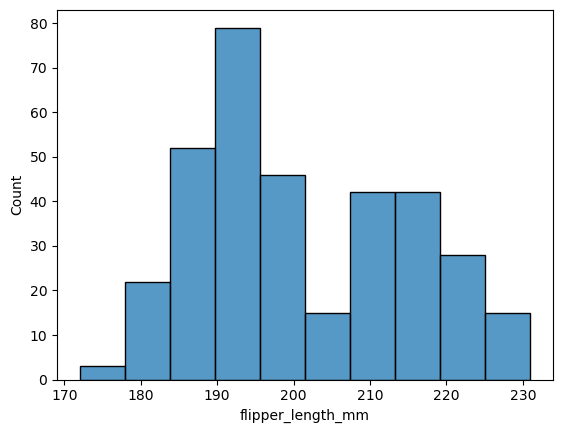

In [22]:
sns.histplot(data=penguins_df, x="flipper_length_mm")

<AxesSubplot: xlabel='body_mass_g', ylabel='Count'>

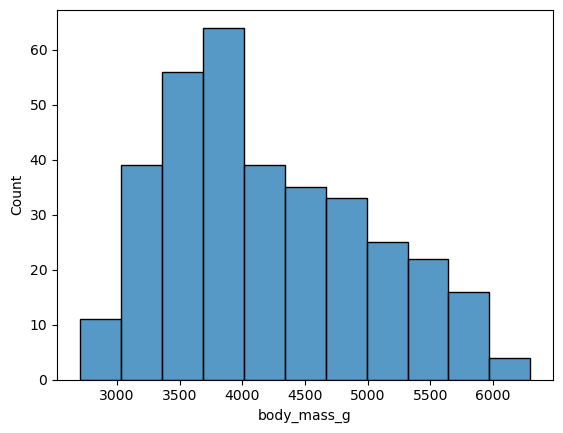

In [23]:
sns.histplot(data=penguins_df, x="body_mass_g")

- ## Bar plots for each categorical variable


### Categorical variables `'species'`, `'island'`, `'sex'`

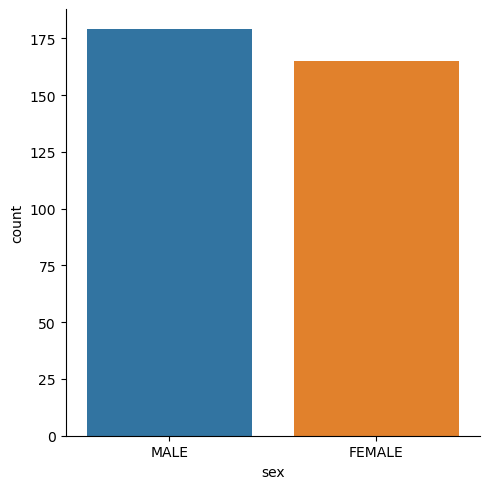

In [24]:
sns.catplot(data=penguins_df,x='sex',kind='count')

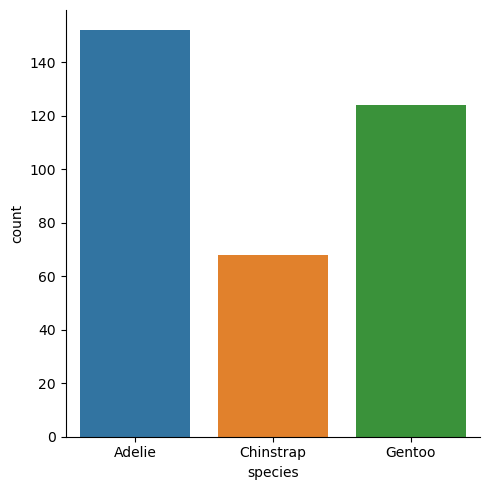

In [25]:
sns.catplot(data=penguins_df,x='species',kind='count')

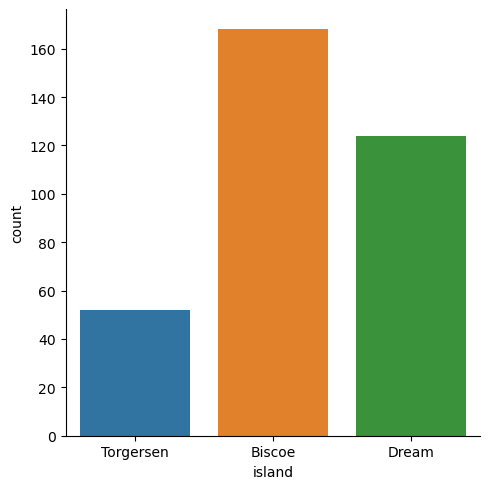

In [26]:
sns.catplot(data=penguins_df,x='island',kind='count')

- ## Summary statistics for each variable

In [27]:
penguins_df.describe(include = 'all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
species,344,3,Adelie,152,NaN,NaN,NaN,NaN,NaN,NaN,NaN
island,344,3,Biscoe,168,NaN,NaN,NaN,NaN,NaN,NaN,NaN
culmen_length_mm,344.0,NaN,NaN,NaN,43.92193,5.443643,32.1,39.275,44.25,48.5,59.6
culmen_depth_mm,344.0,NaN,NaN,NaN,17.15117,1.969027,13.1,15.6,17.3,18.7,21.5
flipper_length_mm,344.0,NaN,NaN,NaN,200.915205,14.020657,172.0,190.0,197.0,213.0,231.0
body_mass_g,344.0,NaN,NaN,NaN,4201.754386,799.613058,2700.0,3550.0,4050.0,4750.0,6300.0
sex,344,2,MALE,179,NaN,NaN,NaN,NaN,NaN,NaN,NaN


![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# IV. Bivariate Analysis


- ## Correlation matrix of numeric variables


In [28]:
penguins_df.corr()

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
culmen_length_mm,1.000000,-0.235053,0.656181,0.595110
culmen_depth_mm,-0.235053,1.000000,-0.583851,-0.471916
flipper_length_mm,0.656181,-0.583851,1.000000,0.871202
body_mass_g,0.595110,-0.471916,0.871202,1.000000


- ## Scatter plots of numeric variables


<AxesSubplot: xlabel='culmen_length_mm', ylabel='culmen_depth_mm'>

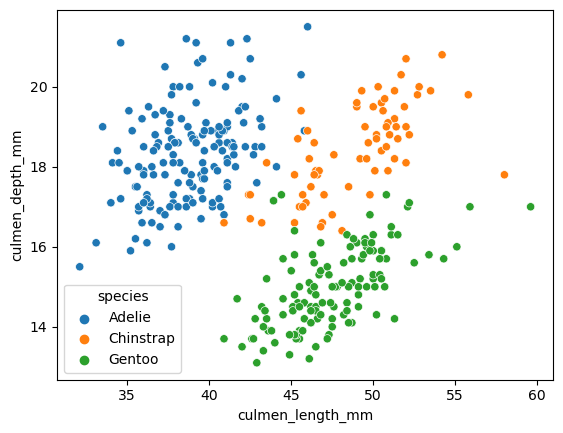

In [29]:
sns.scatterplot(data=penguins_df, x='culmen_length_mm', y='culmen_depth_mm',hue='species')

<AxesSubplot: xlabel='flipper_length_mm', ylabel='body_mass_g'>

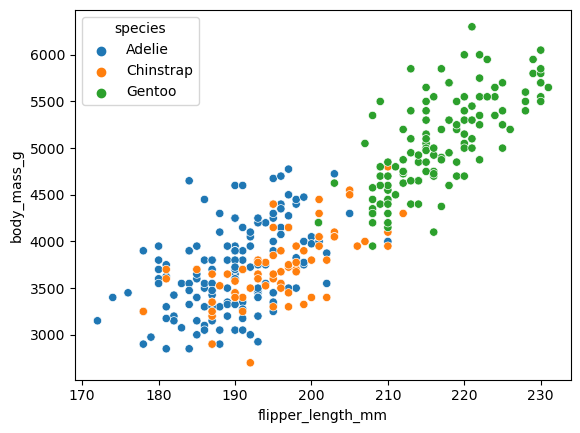

In [30]:
sns.scatterplot(data=penguins_df, x='flipper_length_mm', y='body_mass_g',hue='species')

<AxesSubplot: xlabel='culmen_length_mm', ylabel='flipper_length_mm'>

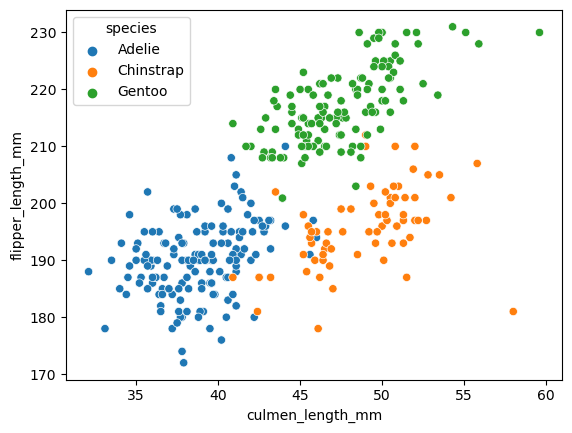

In [31]:
sns.scatterplot(data=penguins_df, x='culmen_length_mm', y='flipper_length_mm',hue='species')

In [32]:
sns.scatterplot(data=, x='culmen_depth_mm', y='flipper_length_mm',hue='species')

SyntaxError: invalid syntax (2996745880.py, line 1)

- ## Box plots of numeric variables grouped by species


<AxesSubplot: xlabel='culmen_length_mm', ylabel='species'>

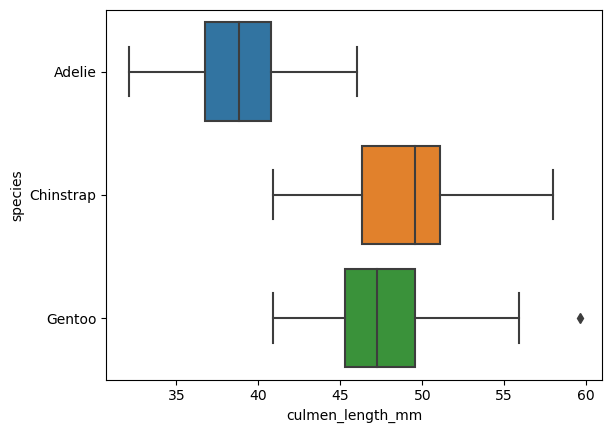

In [33]:
sns.boxplot(data=penguins_df, x="culmen_length_mm", y='species')

<AxesSubplot: xlabel='culmen_depth_mm', ylabel='species'>

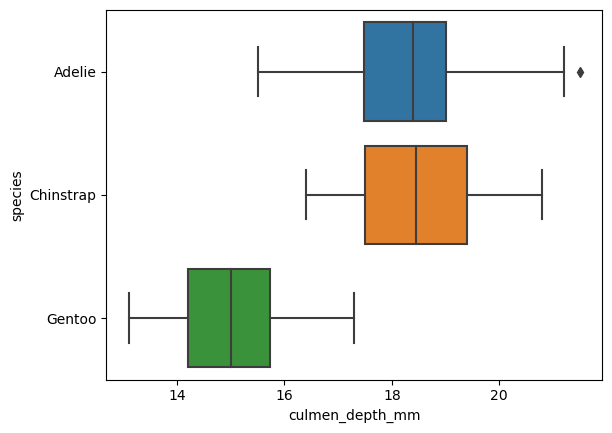

In [34]:
sns.boxplot(data=penguins_df, x="culmen_depth_mm", y='species')

<AxesSubplot: xlabel='flipper_length_mm', ylabel='species'>

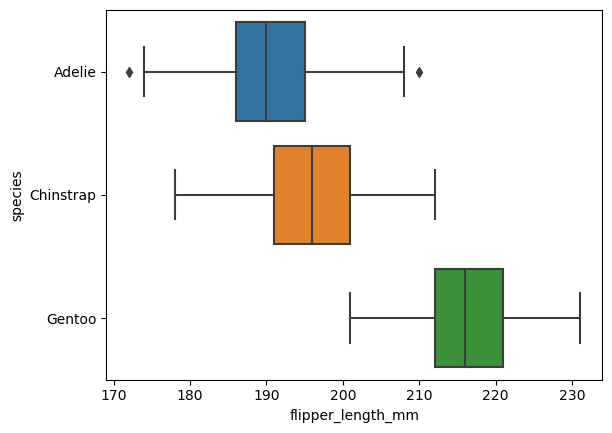

In [35]:
sns.boxplot(data=penguins_df, x="flipper_length_mm", y='species')

<AxesSubplot: xlabel='body_mass_g', ylabel='species'>

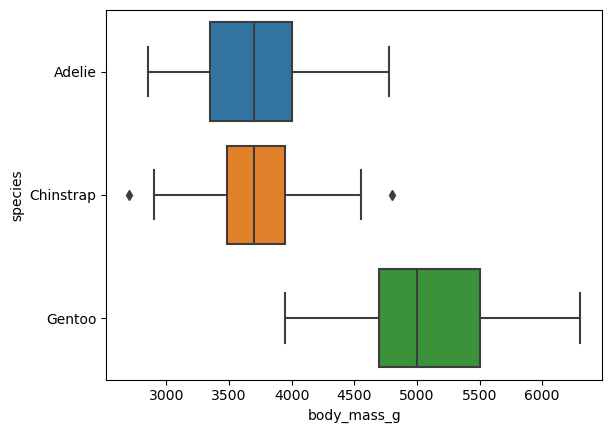

In [36]:
sns.boxplot(data=penguins_df, x="body_mass_g", y='species')

- ## Bar plots of categorical variables grouped by species

In [37]:
['species', 'island', 'sex']

['species', 'island', 'sex']

<AxesSubplot: xlabel='island', ylabel='body_mass_g'>

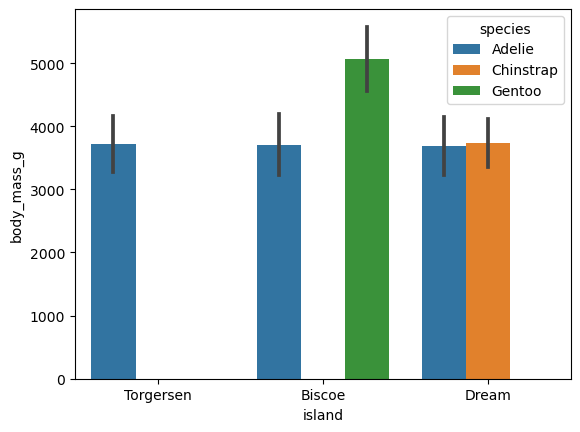

In [38]:
sns.barplot(data=penguins_df, x="island", y='body_mass_g', errorbar="sd", hue = 'species')

<AxesSubplot: xlabel='sex', ylabel='count'>

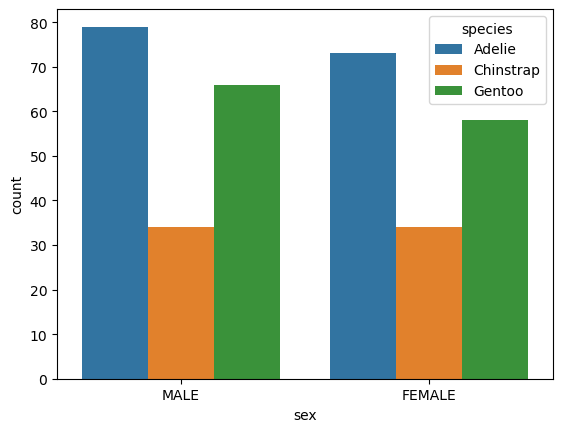

In [39]:
sns.countplot(data = penguins_df ,x ='sex', hue= 'species')

<AxesSubplot: xlabel='island', ylabel='count'>

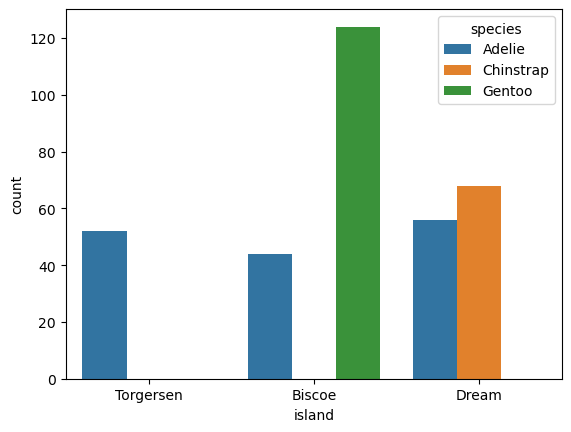

In [40]:
sns.countplot(data = penguins_df ,x ='island', hue= 'species')

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# V. Multivariate Analysis

- ## Heatmap of the correlation matrix to identify highly correlated variables


<AxesSubplot: >

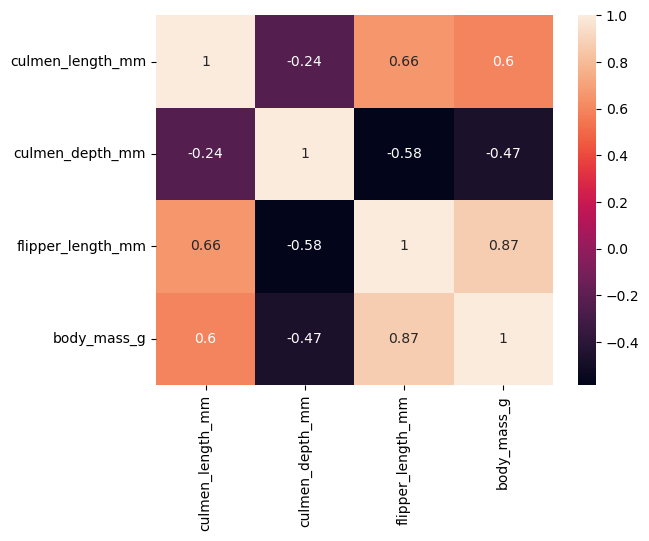

In [41]:
sns.heatmap(data=penguins_df.corr(), annot=True)

- ## Scatter plot matrix to explore the relationship between all pairs of numeric variables

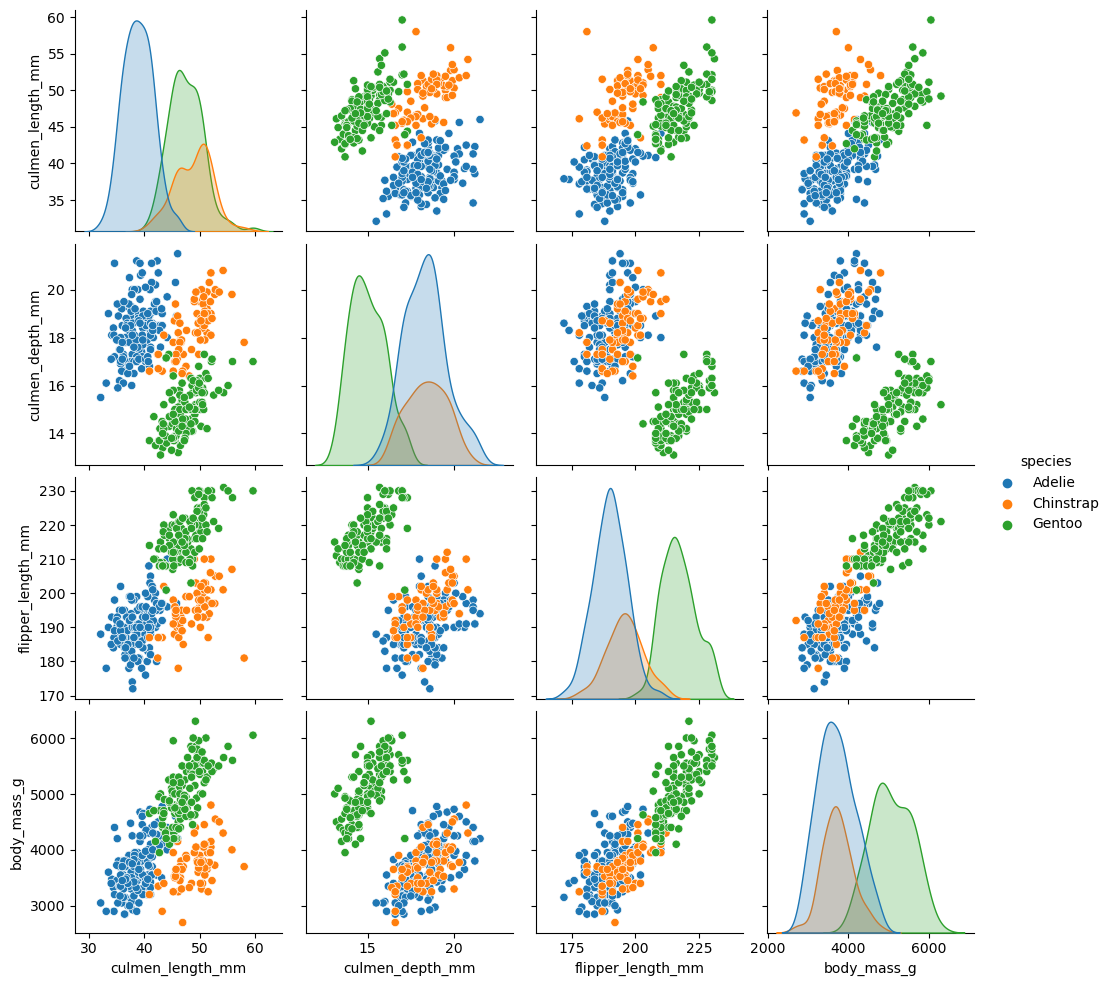

In [42]:
sns.pairplot(penguins_df,hue='species')

- ## Principal component analysis (PCA) to explore the relationship between the variables


In [51]:
penguins_df = penguins_df.drop(['island', 'sex'], axis = 1)
# Input Variable:
X = penguins_df.drop(['species'], axis = 1) 
# Target Variable:
y = penguins_df['species']

In [52]:
# Instantiate a new scaler
scaler = StandardScaler()
# Learn the pattern from the input data
scaler.fit(X)
#Apply the pattern
X_scaled = scaler.transform(X) 
# Convert into Pandas dataframe
X_scaled = pd.DataFrame(X_scaled, columns=X.columns, index=X.index)

In [53]:
X_scaled

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g
0,-8.870812e-01,7.877425e-01,-1.422488,-0.565789
1,-8.134940e-01,1.265563e-01,-1.065352,-0.503168
2,-6.663195e-01,4.317192e-01,-0.422507,-1.192003
3,1.307172e-15,1.806927e-15,0.000000,0.000000
4,-1.328605e+00,1.092905e+00,-0.565361,-0.941517
...,...,...,...,...
339,1.307172e-15,1.806927e-15,0.000000,0.000000
340,5.294731e-01,-1.450118e+00,1.006038,0.811880
341,1.191758e+00,-7.380718e-01,1.506028,1.939064
342,2.351241e-01,-1.195816e+00,0.791756,1.250229


In [54]:
# Use n_components=4 to see explained variance for all columns: 
pca = PCA(n_components=4)
pca.fit(X_scaled)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_[:2].sum())

[0.68843878 0.19312919 0.09130898 0.02712305]
0.8815679694372631


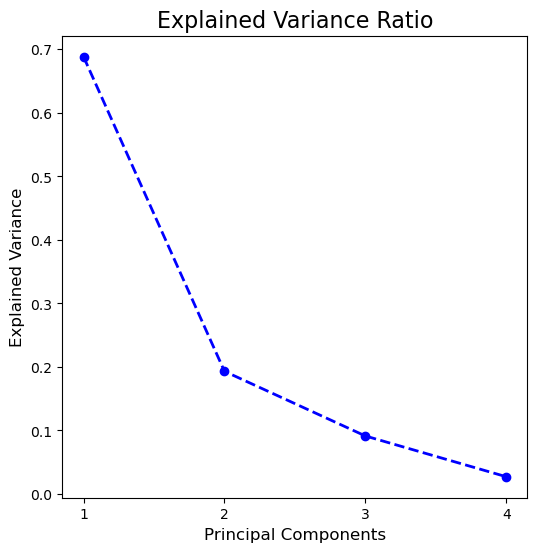

In [57]:
# Visual for each component’s explained variance
fig, ax = plt.subplots(figsize=(6,6))
ax.plot(pca.explained_variance_ratio_,'bo--',linewidth=2)
ax.set_xlabel('Principal Components', fontsize = 12)
ax.set_ylabel('Explained Variance', fontsize = 12)
ax.set_title('Explained Variance Ratio', fontsize = 16)
n = len(pca.explained_variance_ratio_)
plt.xticks(np.arange(n), np.arange(1, n+1));

In [59]:
# Projection onto 2 principal components space: 
pca2 = PCA(n_components=2)
pca2.fit(X_scaled)
principalComponents = pca2.fit_transform(X_scaled)
# Define new dataframe with principal components
df_pca = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])
df_pca = pd.concat([df_pca, penguins_df[['species']]], axis = 1)

In [60]:
df_pca

,principal component 1,principal component 2,species
0,-1.848827e+00,4.784149e-02,Adelie
1,-1.310577e+00,-4.295989e-01,Adelie
2,-1.373179e+00,-1.549274e-01,Adelie
3,1.403880e-15,2.597340e-15,Adelie
4,-1.884312e+00,-2.054387e-03,Adelie
...,...,...,...
339,9.793259e-16,2.532023e-15,Gentoo
340,1.846261e+00,-7.699555e-01,Gentoo
341,2.768803e+00,2.897299e-01,Gentoo
342,1.727393e+00,-7.063257e-01,Gentoo


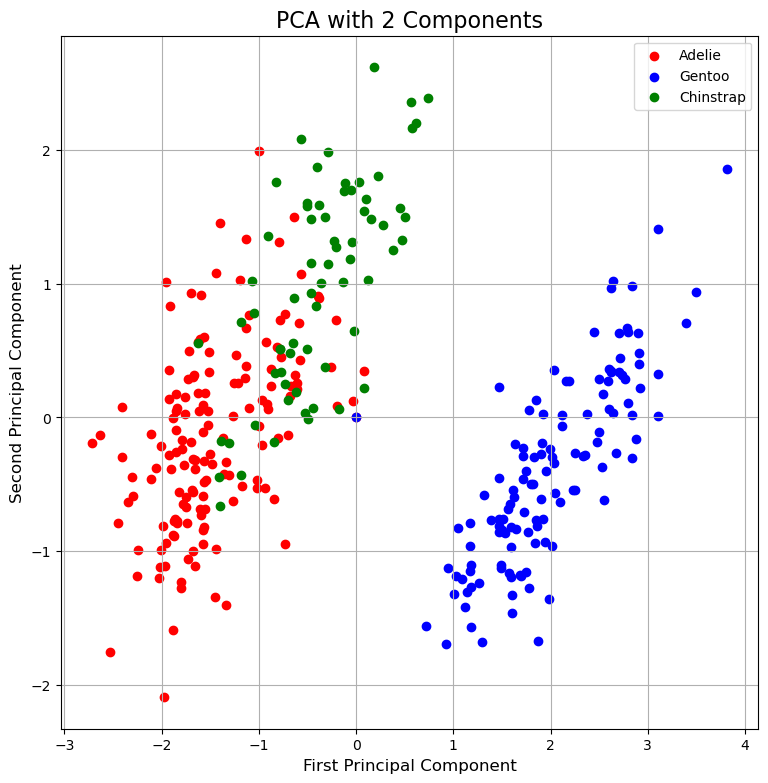

In [68]:
# Visualization of Penguins Data in 2-D after PCA transformation:

fig, ax = plt.subplots(figsize=(9,9)) 
for spe, color in zip(('Adelie', 'Gentoo', 'Chinstrap'), 
                       ('red',   'blue', 'green')): 
    index = df_pca['species'] == spe 
    ax.scatter(df_pca.loc[index, 'principal component 1'],                                                  
                df_pca.loc[index, 'principal component 2'], 
                c = color)




ax.set_xlabel('First Principal Component', fontsize = 12)
ax.set_ylabel('Second Principal Component', fontsize = 12)
ax.set_title('PCA with 2 Components', fontsize = 16)
ax.legend(['Adelie', 'Gentoo', 'Chinstrap'])
ax.grid();

![green-divider](https://user-images.githubusercontent.com/7065401/52071924-c003ad80-2562-11e9-8297-1c6595f8a7ff.png)

# VI. Conclusion



- ## Summary of key findings and insights

- ## Recommendations for further analysis and modeling.

![purple-divider](https://user-images.githubusercontent.com/7065401/52071927-c1cd7100-2562-11e9-908a-dde91ba14e59.png)

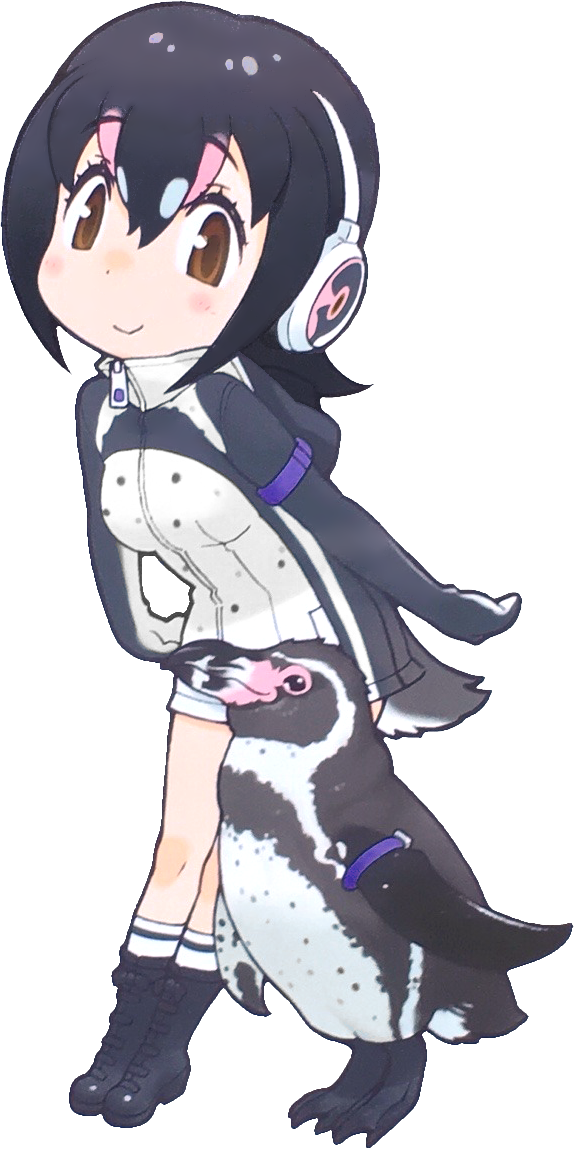